In [1]:
# here is a mathematical expression that takes 3 inputs and produces one output
from math import sin, cos

def f(a, b, c):
  return -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

print(f(2, 3, 4))

def df(a, b, c):
  return -3*a**2 + cos(3*b) + 1.0/c + 2.5*b**1.5 - 0.5*a**-0.5

print(df(2, 3, 4))


def gradf(a, b, c):
  return [-3*a**2 - 0.5*a**-0.5, cos(3*b)*3 + 2.5*b**1.5, 1*c**-2]


# expected answer is the list of
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2,3,4)

for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")


6.336362190988558
-0.024302595711371222
OK for dim 0: expected -12.353553390593273, yours returns -12.353553390593273
OK for dim 1: expected 10.25699027111255, yours returns 10.25699027111255
OK for dim 2: expected 0.0625, yours returns 0.0625


In [2]:
# write the function df that returns the analytical gradient of f
# i.e. use your skills from calculus to take the derivative, then implement the formula
# if you do not calculus then feel free to ask wolframalpha, e.g.:
# https://www.wolframalpha.com/input?i=d%2Fda%28sin%283*a%29%29%29

def gradf(a, b, c):
    out = []
    h = 0.0000001
    
    # da
    da1 = f(a, b, c)
    da2 = f(a+h, b, c)
    da = (da2 - da1) / h
    
    # db
    db1 = f(a, b, c)
    db2 = f(a, b+h, c)
    db = (db2 - db1) / h
    
    # dc
    dc1 = f(a, b, c)
    dc2 = f(a, b, c+h)
    dc = (dc2 - dc1) / h
           
    return [da, db, dc] # todo, return [df/da, df/db, df/dc]

# expected answer is the list of 
ans = [-12.353553390593273, 10.25699027111255, 0.0625]
yours = gradf(2, 3, 4)
for dim in range(3):
  ok = 'OK' if abs(yours[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {yours[dim]}")

OK for dim 0: expected -12.353553390593273, yours returns -12.353553966448771
OK for dim 1: expected 10.25699027111255, yours returns 10.256990385926201
OK for dim 2: expected 0.0625, yours returns 0.06249999628948899


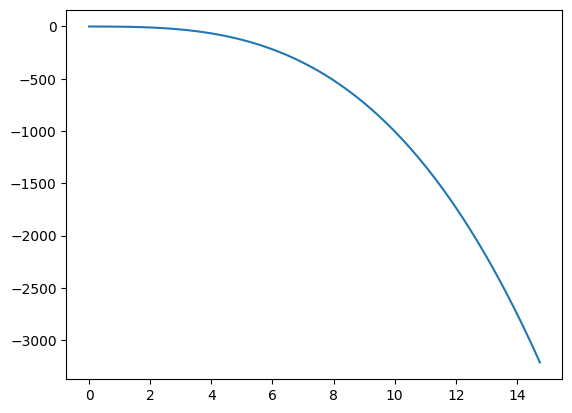

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
xs = np.arange(0, 15, 0.25)
ys = f(xs, 1, 1)
plt.plot(xs,ys)

In [6]:
# now estimate the gradient numerically without any calculus, using
# the approximation we used in the video.
# you should not call the function df from the last cell

# -----------

a=2
b=3
c=4
h = 0.0000001

d = f(a,b,c)
da = f(a+h,b,c)
db = f(a,b+h,c)
dc = f(a,b,c+h)

sa = (da - d) / h
sb = (db - d) / h
sc = (dc - d) / h

print("d ", d)
print("da ", da)
print("db ", db)
print("dc ", dc)
print("sa ", sa)
print("sb ", sb)
print("sc ", sc)

# fa = -a**3 + sin(3*b) - 1.0/c + b**2.5 - a**0.5

# a = -a**3 - a**0.5
# b = sin(3*b) + b**2.5
# c = 1.0/c


# a : -2**3 + sin(3*3) - 1.0/4 + 3**2.5 - 2**0.5
# f(2,3,4) : -8 + 0.15643 - 0.25 + 15.5884 - 1.41421
# f(2,3,4) : -8 + 0,15643 - 0,25 + 15,5884 - 1,41421
# f(2,3,4) : 6.08062
#
# fa1 : -2.0001**3 + sin(3*3) - 1.0/4 + 3**2.5 - 2.0001**0.5
# f(2.0001,3,4) : -8 + 0.15643 - 0.25 + 15.5884 - 1.41421
# f(2.0001,3,4) : -8 + 0,15643 - 0,25 + 15,5884 - 1,41421
# f(2.0001,3,4) : 6.08062
    

    
numerical_grad = [sa, sb, sc] # TODO
# -----------

for dim in range(3):
  ok = 'OK' if abs(numerical_grad[dim] - ans[dim]) < 1e-5 else 'WRONG!'
  print(f"{ok} for dim {dim}: expected {ans[dim]}, yours returns {numerical_grad[dim]}")


d  6.336362190988558
da  6.336360955633161
db  6.336363216687596
dc  6.336362197238557
sa  -12.353553966448771
sb  10.256990385926201
sc  0.06249999628948899
OK for dim 0: expected -12.353553390593273, yours returns -12.353553966448771
OK for dim 1: expected 10.25699027111255, yours returns 10.256990385926201
OK for dim 2: expected 0.0625, yours returns 0.06249999628948899


yoa:  -9.414213562373096
yob:  16.00057575336165
yoc:  -0.25
yoah:  -9.414337098502584
yobh:  16.000678323403672
yoch:  -0.24999937500156252
yas:  [-12.35951021 -12.35956979 -12.35962936 ... -12.95905639 -12.95911796
 -12.95917954]
ybs:  [10.25838762 10.25840163 10.25841565 ... 10.44022825 10.44025108
 10.44027391]
ycs:  [0.06248438 0.06248422 0.06248407 ... 0.06097606 0.06097591 0.06097576]


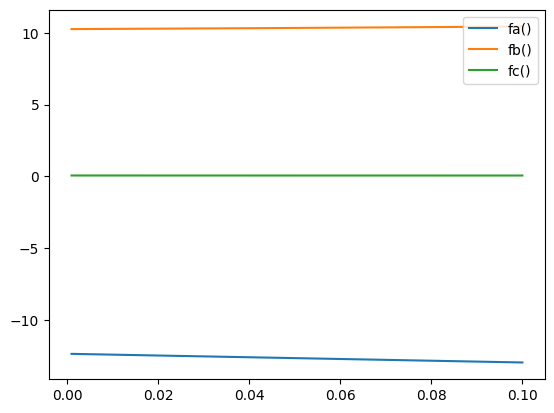

In [7]:
import numpy as np

def f(a, b, c):
  return -a**3 + np.sin(3*b) - 1.0/c + b**2.5 - a**0.5

def fa(a):
    return -a**3 - a**0.5

def fb(b):
  return  b**2.5 + np.sin(3*b)

def fc(c):
  return - (1.0/c)


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2
b = 3
c = 4
h = 0.00001
hs = np.arange(0.001, 0.1, 0.00001)

yoa = fa(a)
yob = fb(b)
yoc = fc(c)
print("yoa: ", yoa)
print("yob: ", yob)
print("yoc: ", yoc)


yoah = fa(a+h)
yobh = fb(b+h)
yoch = fc(c+h)
print("yoah: ", yoah)
print("yobh: ", yobh)
print("yoch: ", yoch)

yas = (fa(a+hs) - fa(a)) / hs
print("yas: ", yas)
plt.plot(hs, yas, label='fa()')

ybs = (fb(b+hs) - fb(b)) / hs
print("ybs: ", ybs)
plt.plot(hs, ybs, label='fb()')

ycs = (fc(c+hs) - fc(c)) / hs
print("ycs: ", ycs)
plt.plot(hs, ycs, label='fc()')


plt.legend()